# Question 1

I chose to calculate my matrix of distances using 1-similarities, where similarities is the matrix of psychological similarity ratings. 

You can also calculate distance as 1/similarity or (1-similarity)/similarity. Essentially, distance is an inverse of similarity. There has been much research supporting different ways of implementing a calculation of distance. But since our data set hovers on a scale from (-1,1), I decided to use the simplest and most intuitive measure: 1-similarity.











































# Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

names = ["football", "baseball", "basketball", "tennis", "softball", "canoeing", "handball", "rugby", "hockey",
         "ice hockey", "swimming", "track", "boxing", "volleyball", "lacrosse", "skiing", "golf", "polo", "surfing",
         "wrestling", "gymnastics"]

similarities = np.loadtxt(open("similarities.csv", "rb"), delimiter=",", skiprows=1)

distances = 1-similarities
D = 2
N = distances.shape[0]  # the number of items
assert (distances.shape[1] == N and N == len(names))

# euclidean distance between 2 any given points
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def stress(p):
    stress_sum = 0
    for i in np.arange(0, N):
        for j in np.arange(i+1, distances.shape[1]):
            stress_sum += (distances[i,j] - dist(p[i], p[j]))**2
    return stress_sum

# helper function for compute_gradient
def add_delta(p, i, d, delta):
    v = np.array(p)
    v[i, d] += delta
    return v

# gradient descent on each element of p
def compute_gradient(p, i, d, delta):
    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2*delta)

def compute_full_gradient(p):
    matrix = []
    for i in np.arange(0,len(p)):
        row = []
        
        for d in np.arange(0,len(p[i])):
            row.append(compute_gradient(p, i, d, .001))
        
        matrix.append(row)

    return np.array(matrix)

Original stress: 433.03710250669343
New stress: 13.10972762959018


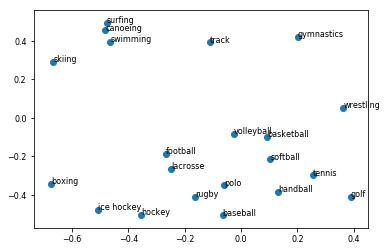

In [196]:
def MDS():
    pos = np.random.normal(0.0, 1.0, (N, D))
    print("Original stress: " + str(stress(pos)))

    steps = 0
    stress_list = np.array([])
    iterations = np.array([])
    while (steps <= 300):
        step_size = .001 * compute_full_gradient(pos)
        pos -= step_size
        stress_list = np.append(stress(pos), stress_list)
        iterations = np.append(steps, iterations)

        steps += 1

    print("New stress: " + str(stress(pos)))
    return pos
def plot(pos):
    x_data = np.array([])
    y_data = np.array([])
    
    for i in np.arange(0,len(pos)):
        x_data = np.append(pos[i, 0], x_data)
        y_data = np.append(pos[i, 1], y_data)

    plt.scatter(x_data, y_data)

    for i in np.arange(0,N):
        plt.annotate(names[i], main_pos[i])
main_pos = MDS()
plot(main_pos)

The results generally do intuitively make sense. The MDS algorithm puts clusters of sports together pretty well. For example, there is a cluster for water sports: canoeing, surfing, swimming. There is another cluster for sports that use larger balls: basketball, softball, volleyball, etc. However, on each simulation, there are a few that go astray and this is likely due to the algorithm finding a local minumum as opposed to an absolute minimum, which is dependent on the initial scattering.

# Question 3A

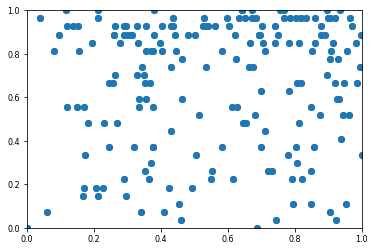

In [197]:
def MDS_distances(pos):
    MDS_dist = np.array([])
    for i in np.arange(0,21):
        for j in np.arange(0,21):
            MDS_dist = np.append(dist(pos[i], pos[j]), MDS_dist)
    return MDS_dist
        
flat_distances = np.ravel(distances)
plt.ylim(0,1)
plt.xlim(0,1)
plt.scatter(MDS_distances(main_pos), flat_distances)

This scatter plot looks pretty bad, there is relatively little association between the MDS calculated distances and psychological distances. Again, this is likely due to the algorithm working with local minimums in the gradient descent.



















# Question 3B

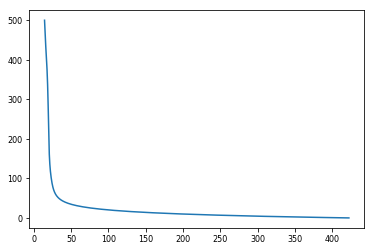

In [198]:
plt.plot(stress_list, iterations)

This plot shows there is a steep descent in reducing stress within 50 iterations. More than about 300 doesn't reduce stress in our MDS generated graphs too much and are therefore not too needed. The algorithm cannot reach 0 unless it finds the absolute minimum doing gradient descent, which is fairly unlikely as the number of items increases. 

# Question 4

In [234]:
def plotting_data(pos):
    x_data = np.array([])
    y_data = np.array([])
    
    for i in np.arange(0,len(pos)):
        x_data = np.append(pos[i, 0], x_data)
        y_data = np.append(pos[i, 1], y_data)
    return [x_data, y_data]

Original stress: 407.0906447322879
New stress: 12.75733646668594


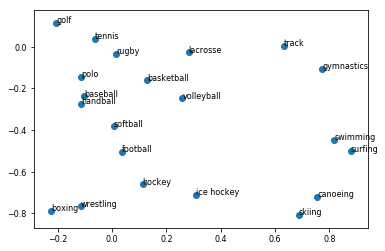

In [236]:
MDS1 = MDS()
MDS1_data = plotting_data(MDS1)
plt.scatter(MDS1_data[0], MDS1_data[1], label='MDS Run 1')
for i in np.arange(0,len(MDS1)):
    plt.annotate(names[i], MDS1[i])

Original stress: 619.1052180213874
New stress: 12.489552276052368


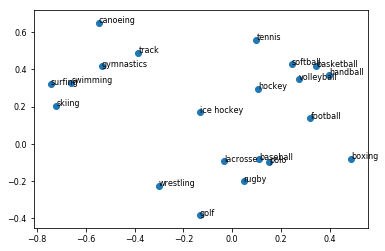

In [237]:
MDS2 = MDS()
MDS2_data = plotting_data(MDS2)
plt.scatter(MDS2_data[0], MDS2_data[1], label='MDS Run 2')
for i in np.arange(0,len(MDS2)):
    plt.annotate(names[i], MDS2[i])

Original stress: 444.51086423228065
New stress: 13.81680312803931


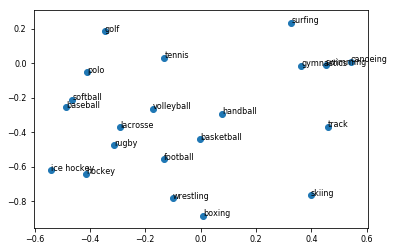

In [238]:
MDS3 = MDS()
MDS3_data = plotting_data(MDS3)
plt.scatter(MDS3_data[0], MDS3_data[1], label='MDS Run 3')
for i in np.arange(0,len(MDS3)):
    plt.annotate(names[i], MDS3[i])

Original stress: 331.2372392176053
New stress: 13.86693650961236


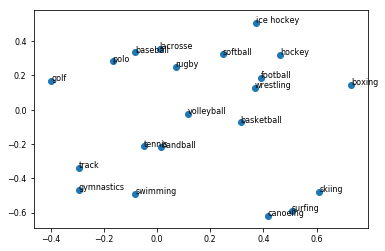

In [240]:
MDS4 = MDS()
MDS4_data = plotting_data(MDS4)
plt.scatter(MDS4_data[0], MDS4_data[1], label='MDS Run 4')
for i in np.arange(0,len(MDS4)):
    plt.annotate(names[i], MDS4[i])

Original stress: 301.7825757689432
New stress: 22.30516577380293


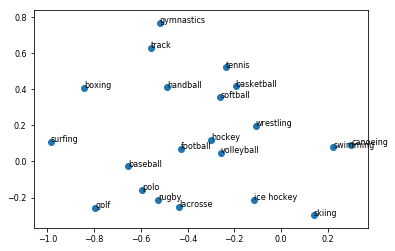

In [241]:
MDS5 = MDS()
MDS5_data = plotting_data(MDS5)
plt.scatter(MDS5_data[0], MDS5_data[1], label='MDS Run 5')
for i in np.arange(0,len(MDS5)):
    plt.annotate(names[i], MDS5[i])

These plots are not all the same. Since they all begin at different initial positions, the clusters move towards different parts of the graph. Since the MDS algorithm simply works off of absolute distances, the placement of each point shifts everytime it runs, however the distances between each point should remain the same.



























# Question 5

The best run was run 1, with resulting stress 12.489552276052368. The plot is shown again below


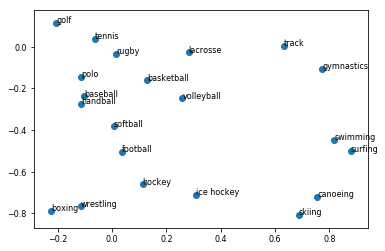

In [243]:
a = [stress(MDS1), stress(MDS2), stress(MDS3), stress(MDS4), stress(MDS5)]
best = min(a)
optimal = a.index(best)
print(f"The best run was run {optimal}, with resulting stress {best}. The plot is shown again below")
plt.scatter(MDS1_data[0], MDS1_data[1], label='MDS Run 1')
for i in np.arange(0,len(MDS1)):
    plt.annotate(names[i], MDS1[i])

I picked the "best run" out of the 5 runs by calculating which run came out with the lowest resulting stress since the stress value is essentially a measure of error.
